# Import Numpy, yFinance, Pandas, Sk-Learn

In [21]:
import yfinance as yf
import robin_stocks as rb
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import date
import json
import pandas as pd
plt.style.use('fivethirtyeight')

# Useful Functions

In [22]:
def stock_data(ticker, start, end, interval):
    df= yf.Ticker(ticker)
    df = df.history(start=start, end=end, interval=interval)
    df.reset_index(level=0, inplace=True)
    return df
def rolling_average(df,columns, window):
    return df[columns].rolling(window).mean()
def rolling_std(df,columns, window):
    return df[columns].rolling(window).std()
def saveAsJson(tickerName,startDate,endDate, df):
    data.to_json(r''+tickerName+startDate+endDate+'Data.json')
def loadJson(file):
    return pd.read_json(file) 

# Point of Interest

In [14]:
today = date.today()

today = today.strftime("%Y-%m-%d")
ticker = "KOS"
start = "2020-10-01"
end = today
interval = "1d"

data = stock_data(ticker, start, end, interval)
data['mu_20'] = rolling_average(data,'Close',20)
data['std_20'] = rolling_std(data,'Close',20)
data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,mu_20,std_20
0,2020-10-01,0.98,1.00,0.96,0.98,5669200,0,0,NaN,NaN
1,2020-10-02,0.95,1.03,0.90,1.03,8162600,0,0,NaN,NaN
2,2020-10-05,1.31,1.32,1.08,1.12,43064500,0,0,NaN,NaN
3,2020-10-06,1.11,1.14,1.01,1.04,10607000,0,0,NaN,NaN
4,2020-10-07,1.07,1.08,1.04,1.08,5603100,0,0,NaN,NaN


In [16]:
saveAsJson(ticker,start,end,data)

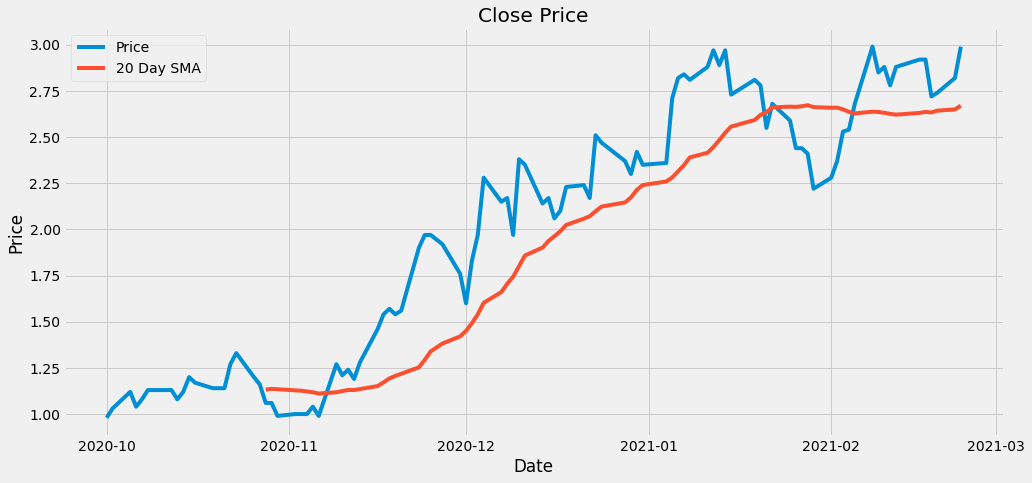

In [4]:
plt.figure(figsize = (15,7))

plt.plot(data['Date'],data['Close'],label = "Price")
plt.plot(data['Date'],data['mu_20'],label = "20 Day SMA")
plt.title("Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Proposed Strategy 

## Ideas

- using random sample to see whether gains are within normal movement or to make autotrade or need further investiation
- comparing companies with snp 500 to see whether company is out performing amret

## STD Strat.

Description:

In [5]:
def StandardDeviationStrategy(data, valuation):
    zScores = [(data["Close"][day] - data["mu_20"][day]) / data["std_20"][day] for day in range(len(data))]

    shares = 0
    hasPosition = False

    netWorth = []
    decisions = []

    for day in range(len(data)):
        # Sell short if the z-score is > 1
        if zScores[day] > 1 and hasPosition:
            valuation = shares * data["Close"][day]
            shares = 0
            decisions.append("Sell")
            hasPosition = False
        # Buy long if the z-score is < 1
        elif zScores[day] < -1 and hasPosition == False:
            shares = valuation / data["Close"][day]
            decisions.append("Buy")
            hasPosition = True
        # Clear positions if the z-score less than .5
        elif abs(zScores[day]) < 0.5 and hasPosition:
            valuation = shares * data["Close"][day]
            shares = 0
            decisions.append("Clear")
            hasPosition = False
        # Hold if z-score greater than .5
        else:
            decisions.append("Holding")
        netWorth.append(valuation)
    print("Returns: $" + str(valuation))
    return netWorth, decisions

In [6]:
netWorth, decisions = StandardDeviationStrategy(data, 1000)

Returns: $1247.2162084720715


# Test Strategy

In [7]:
def backTesting(strat, data, valuation):
    zScores = [(data["Close"][day] - data["mu_20"][day]) / data["std_20"][day] for day in range(len(data))]

    shares = 0
    hasPosition = False

    netWorth = []
    decisions = []

    for day in range(len(data)):
        ZScore = zScores[day]
        price = data["Close"][day]
        # Sell short if the z-score is > 1
        if zScore > 1 and hasPosition:
            valuation = shares * price
            shares = 0
            decisions.append("Sell")
            hasPosition = False
        # Buy long if the z-score is < 1
        elif zScore < -1 and hasPosition == False:
            shares = valuation / price
            decisions.append("Buy")
            hasPosition = True
        # Clear positions if the z-score less than .5
        elif abs(zScore) < 0.5 and hasPosition:
            valuation = shares * price
            shares = 0
            decisions.append("Clear")
            hasPosition = False
        # Hold if z-score greater than .5
        else:
            decisions.append("Holding")
        netWorth.append(valuation)
    print("Returns: $" + str(valuation))
    return netWorth, decisions

# Disseminate information

### Mark up, should be converted over to Java using interactive trader instead, better for streaming data